In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = np.genfromtxt(r'E:\Courses\Advanced AI\optimization\Lab 2\MultiVarLR.csv',delimiter=',')

In [3]:
x = data[:,:-1]

y = data[:,-1]

In [4]:
xs=pd.DataFrame(x)
y2=pd.DataFrame(y)
xs
y2

,0
0,152.0
1,185.0
2,180.0
3,196.0
4,142.0
5,101.0
6,149.0
7,115.0
8,175.0
9,164.0


In [5]:
m=x.shape[0]
m

25

In [6]:
def stander(col):
    return (col - col.mean()) / (col.std() + 1e-8)

In [7]:

xs = (xs - xs.mean()) / (xs.std() + 1e-8)

In [65]:
def BGD_LR(x,y,alpha=0.05,itirations=1000,gradient_norm=0.001,loss_condition=0.001):
    from sklearn.metrics import r2_score
    m=x.shape[0]
    loss=[]
    x=np.array(x)
    y=np.array(y).reshape(-1,1)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    w=np.zeros(x.shape[1]).reshape(-1,1)
    thetas=[] # return tensor 
    for i in range (itirations):
        hx=x@w
        e=hx-y
        j=e.T@e/(2*m)
        loss.append(j)
        G=(x.T@e)/m
        thetas.append(w.copy())
        if np.linalg.norm(G)<=(gradient_norm):
            print (f''' Gradient Norm condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}''')
            break
        if i>2 and np.absolute(loss[i-1]-loss[i])<loss_condition:
            print (f'''loss condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={loss[i]-loss[i-1]}
            ''')
            break
        
        w=w-alpha*G
    hx=x@w
    print('you finshed your itirations ')
    print (f'R2 score ={r2_score(y,hx)}')
    return np.array (w) ,hx,np.array(loss),np.array(thetas)
        
        

In [16]:
def BGD_LR(x, y, alpha=0.05, itirations=1000, gradient_norm=0.001, loss_condition=0.001):
    from sklearn.metrics import r2_score
    import numpy as np

    # 1. Get number of samples and prepare data as numpy arrays
    m = x.shape[0]
    loss = []
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)

    # 2. Augment features matrix with a column of ones for the bias (intercept)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)

    # 3. Initialize weights (theta) with zeros
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    thetas = [] # To store the history of weights for visualization/debugging

    for i in range(itirations):
        # 4. Hypothesis: Linear combination of features and weights (Predicted Y)
        hx = x @ w
        
        # 5. Error: Difference between prediction and actual target
        e = hx - y
        
        # 6. Cost Function: Mean Squared Error (MSE)
        # Result is a 1x1 matrix (the "inflated" dimension you mentioned)
        j = (e.T @ e) / (2 * m)
        loss.append(j)
        
        # 7. Gradient: Compute the derivative of the cost function w.r.t weights
        G = (x.T @ e) / m
        
        # Store current weights before update
        thetas.append(w.copy())
        
        # 8. Convergence Check: Stop if the gradient magnitude is negligible
        if np.linalg.norm(G) <= (gradient_norm):
            print(f'Gradient Norm condition - Stopped at epoch {i}')
            break
            
        # 9. Convergence Check: Stop if the improvement in loss is below threshold
        if i > 2 and np.absolute(loss[i-1] - loss[i]) < loss_condition:
            print(f'Loss condition - Stopped at epoch {i}')
            break
        
        # 10. Parameter Update: Standard Gradient Descent rule
        # Move weights in the opposite direction of the gradient
        w = w - alpha * G

    # 11. Post-training evaluation
    hx_final = x @ w
    print('Training Finished.')
    print(f'Final R2 score = {r2_score(y, hx_final)}')
    
    return np.array(w), hx_final, np.array(loss), np.array(thetas)

In [18]:
w,hx,loss,theta=BGD_LR(x,y,alpha=.0001)
theta

Loss condition - Stopped at epoch 620
Training Finished.
Final R2 score = 0.9879310084690472


array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.62040000e-02],
        [1.30758000e+00],
        [1.31472000e+00],
        [1.34670800e+00]],

       [[6.48895936e-04],
        [5.18495746e-02],
        [5.20240698e-02],
        [5.58824964e-02]],

       ...,

       [[5.50917376e-03],
        [4.96104648e-01],
        [5.33387025e-01],
        [9.87867423e-01]],

       [[5.50290788e-03],
        [4.95925224e-01],
        [5.33310282e-01],
        [9.88116866e-01]],

       [[5.49663827e-03],
        [4.95746035e-01],
        [5.33233797e-01],
        [9.88365831e-01]]])

In [37]:

theta.shape=(-1,4)
theta

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  1.6204    ,   0.21837611,   0.21454457,   0.22443679],
       [  3.224596  ,   0.43087585,   0.42331633,   0.44310425],
       ...,
       [161.98284409,   6.3959958 ,   6.78316925,  11.66856918],
       [161.98341565,   6.39427156,   6.78244264,  11.67105836],
       [161.98398149,   6.39254882,   6.78171769,  11.67354432]])

In [53]:
xs.head()

,0,1,2
0,73.0,80.0,75.0
1,93.0,88.0,93.0
2,89.0,91.0,90.0
3,96.0,98.0,100.0
4,73.0,66.0,70.0


In [54]:
y2.head()

,0
0,152.0
1,185.0
2,180.0
3,196.0
4,142.0


In [56]:
xs=np.array(xs)
y2=np.array(y2).reshape(-1,1)
all_data=np.concatenate((x,y),axis=1)
np.random.shuffle(all_data)
all_data

array([[ 73.,  66.,  70., 142.],
       [ 96.,  98., 100., 196.],
       [ 81.,  90.,  93., 183.],
       [ 79.,  70.,  88., 164.],
       [ 87.,  79.,  90., 175.],
       [ 89.,  91.,  90., 180.],
       [ 82.,  86.,  90., 177.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 86.,  82.,  89., 175.],
       [ 69.,  74.,  77., 149.],
       [ 93.,  89.,  96., 192.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  85., 175.],
       [ 69.,  70.,  73., 141.],
       [ 93.,  88.,  93., 185.],
       [ 76.,  83.,  71., 149.],
       [ 47.,  56.,  60., 115.],
       [ 79.,  80.,  73., 152.],
       [ 78.,  75.,  68., 147.],
       [ 53.,  46.,  55., 101.],
       [ 78.,  83.,  77., 159.],
       [ 70.,  73.,  78., 148.],
       [ 73.,  80.,  75., 152.],
       [ 96.,  93.,  95., 192.]])

In [62]:
xs=all_data[:,:-1]
y2=all_data[:,-1].reshape(-1,1)
xs,y2

(array([[ 73.,  66.,  70.],
        [ 96.,  98., 100.],
        [ 81.,  90.,  93.],
        [ 79.,  70.,  88.],
        [ 87.,  79.,  90.],
        [ 89.,  91.,  90.],
        [ 82.,  86.,  90.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 86.,  82.,  89.],
        [ 69.,  74.,  77.],
        [ 93.,  89.,  96.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  85.],
        [ 69.,  70.,  73.],
        [ 93.,  88.,  93.],
        [ 76.,  83.,  71.],
        [ 47.,  56.,  60.],
        [ 79.,  80.,  73.],
        [ 78.,  75.,  68.],
        [ 53.,  46.,  55.],
        [ 78.,  83.,  77.],
        [ 70.,  73.,  78.],
        [ 73.,  80.,  75.],
        [ 96.,  93.,  95.]]),
 array([[142.],
        [196.],
        [183.],
        [164.],
        [175.],
        [180.],
        [177.],
        [141.],
        [184.],
        [175.],
        [149.],
        [192.],
        [177.],
        [175.],
        [141.],
        [185.],
        [149.],
        [115.],
        [1

In [70]:
def MBGD_LR(x,y,  alpha=0.05,batch_size=100 ,epochs=10 ,  gradient_norm=0.001  ,  loss_condition=0.001):
    m=x.shape[0]
    x=np.array(x)
    y=np.array(y).reshape(-1,1)
    all_data=np.concatenate((x,y),axis=1)
    np.random.shuffle(all_data)
    x=all_data[:,:-1]
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    y=all_data[:,-1].reshape(-1,1)
    m=x.shape[0]
    loss=[]
    w=np.zeros(x.shape[1]).reshape(-1,1)
    thetas=[] # return tensor 
    total_loss=[]
    for i in range (epochs) :
        start=0 
        end= 0
        total_epoch_loss=0
        while(start<m):
            end=start+batch_size if (start+batch_size)<m else m
            x_temp=x[start:end,:]
            y_temp=y[start:end,:]
            m_temp=x_temp.shape[0]
            hx=x_temp@w
            e=hx-y_temp
            j=e.T@e/(2*m_temp)
            loss.append(j)
            G=(x_temp.T@e)/m_temp
            thetas.append(w.copy())
            start=end
            w=w-alpha*G
            total_epoch_loss+=np.absolute(j)
        total_loss.append(total_epoch_loss)
        if np.linalg.norm(G)<=(gradient_norm):
             print (f''' Gradient Norm condation
             stop in epoch number {i} 
             gredient norm = {np.linalg.norm(G)}''')
             break
        if i>2 and np.absolute(total_loss[i-1]-total_loss[i])<loss_condition:
            print (f'''loss condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={total_loss[i-1]-total_loss[i]}
            ''')
            break
    y_mean = np.mean(y)
    ss_res, ss_tot = 0, 0
    for s in range(0, m, batch_size):
        e = min(s + batch_size, m)
        y_p = x[s:e, :] @ w
        ss_res += np.sum((y[s:e] - y_p)**2)
        ss_tot += np.sum((y[s:e] - y_mean)**2)
    
    print(f'Final R2 Score = {1 - (ss_res / ss_tot)}') 
    print('you finshed your itirations ')
    
    return np.array (w) ,np.array(loss),np.array(thetas)
            
    

In [19]:
def MBGD_LR(x, y, alpha=0.05, batch_size=100, epochs=10, gradient_norm=0.001, loss_condition=0.001):
    from sklearn.metrics import r2_score
    import numpy as np

    # 1. Basic preprocessing and data conversion
    m = x.shape[0]
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)

    # 2. Shuffle data at the start to ensure batches are representative and prevent bias
    all_data = np.concatenate((x, y), axis=1)
    np.random.shuffle(all_data)
    x = all_data[:, :-1]
    y = all_data[:, -1].reshape(-1, 1)

    # 3. Add intercept (Bias) term
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    
    # 4. Initialize parameters
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    loss = []         # Stores loss for every single batch update
    thetas = []       # Stores weight history
    total_loss = []   # Stores the accumulated loss per epoch

    for i in range(epochs):
        start = 0
        total_epoch_loss = 0
        
        # 5. Mini-batch loop: Iterate over the dataset in small chunks
        while start < m:
            # Determine the end index of the current batch
            end = start + batch_size if (start + batch_size) < m else m
            x_temp = x[start:end, :]
            y_temp = y[start:end, :]
            m_temp = x_temp.shape[0]

            # 6. Forward pass on the mini-batch
            hx = x_temp @ w
            e = hx - y_temp
            
            # 7. Compute Batch Loss (Cost)
            j = (e.T @ e) / (2 * m_temp)
            loss.append(j)
            
            # 8. Compute Gradient based ONLY on the current mini-batch
            G = (x_temp.T @ e) / m_temp
            thetas.append(w.copy())
            
            # 9. Update Weights (Standard GD rule applied per batch)
            w = w - alpha * G
            
            # Move to the next batch
            start = end
            
            # Accumulate loss to monitor epoch-level performance
            total_epoch_loss += np.absolute(j)
            
        total_loss.append(total_epoch_loss)

        # 10. Convergence Check: Gradient Norm (from the last batch of the epoch)
        if np.linalg.norm(G) <= gradient_norm:
            print(f'Gradient Norm Condition - Stopped at epoch {i}')
            break
            
        # 11. Convergence Check: Stability of total epoch loss
        if i > 2 and np.absolute(total_loss[i-1] - total_loss[i]) < loss_condition:
            print(f'Loss Condition - Stopped at epoch {i}')
            break

    # 12. Evaluation: Manual R2 Score calculation across the entire dataset
    y_mean = np.mean(y)
    ss_res, ss_tot = 0, 0
    for s in range(0, m, batch_size):
        e = min(s + batch_size, m)
        y_p = x[s:e, :] @ w
        ss_res += np.sum((y[s:e] - y_p)**2)
        ss_tot += np.sum((y[s:e] - y_mean)**2)
    
    print(f'Final R2 Score = {1 - (ss_res / ss_tot)}') 
    print('Training Finished.')
    
    return np.array(w), np.array(loss), np.array(thetas)

In [20]:
w,loss,theta=MBGD_LR(x,y,alpha=.00001,batch_size=10,epochs=100)

Final R2 Score = 0.9795736653431664
Training Finished.


In [75]:
loss = np.array(loss).flatten()

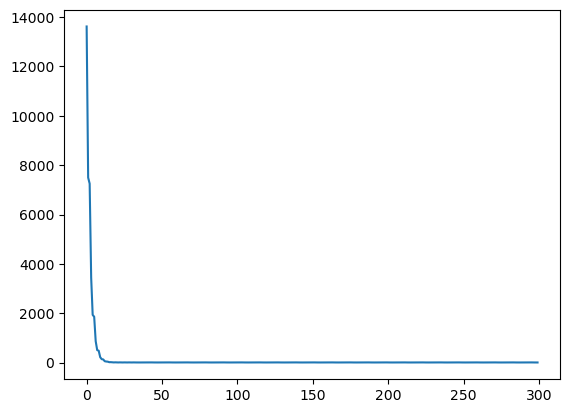

In [76]:
plt.plot(loss)

In [ ]:
def MOMENTUM_BGD_LR(x,y,alpha=0.05, momentum_gama=0,itirations=1000,gradient_norm=0.001,loss_condition=0.001):
    from sklearn.metrics import r2_score
    m=x.shape[0]
    loss=[]
    x=np.array(x)
    y=np.array(y).reshape(-1,1)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    w=np.zeros(x.shape[1]).reshape(-1,1)
    thetas=[] # return tensor 
    momentam=np.zeros(x.shape[1]).reshape(-1,1)
    for i in range (itirations):
        hx=x@w
        e=hx-y
        j=e.T@e/(2*m)
        loss.append(j)
        G=(x.T@e)/m
        vt=alpha*G+momentum_gama*momentam
        thetas.append(w.copy())
        if np.linalg.norm(G)<=(gradient_norm):
            print (f''' Gradient Norm condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}''')
            break
        if i>2 and np.absolute(loss[i-1]-loss[i])<loss_condition:
            print (f'''loss condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={loss[i]-loss[i-1]}
            ''')
            break
        
        w=w-vt
        momentam=vt
    hx=x@w
    print('you finshed your itirations ')
    print (f'R2 score ={r2_score(y,hx)}')
    return np.array (w) ,hx,np.array(loss),np.array(thetas)
        

In [21]:
def MOMENTUM_BGD_LR(x, y, alpha=0.05, momentum_gama=0.9, itirations=1000, gradient_norm=0.001, loss_condition=0.001):
    from sklearn.metrics import r2_score
    import numpy as np

    # 1. Prepare data and get dimensions
    m = x.shape[0]
    loss = []
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)

    # 2. Add bias term (column of ones) to features matrix
    x = np.concatenate((np.ones((m, 1)), x), axis=1)

    # 3. Initialize weights and velocity (momentum) vector
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    thetas = [] 
    momentam = np.zeros(x.shape[1]).reshape(-1, 1) # This stores the moving average of gradients

    for i in range(itirations):
        # 4. Standard Forward Pass: prediction using current weights
        hx = x @ w
        
        # 5. Calculate Error and Cost (MSE)
        e = hx - y
        j = (e.T @ e) / (2 * m)
        loss.append(j)
        
        # 6. Compute Gradient at the current position
        G = (x.T @ e) / m
        
        # 7. Update Velocity (vt): 
        # Combined weighted average of previous velocity and current gradient
        vt = alpha * G + momentum_gama * momentam
        
        thetas.append(w.copy())
        
        # 8. Convergence Check: Stop if gradient is small enough
        if np.linalg.norm(G) <= (gradient_norm):
            print(f'Gradient Norm condition - Stopped at epoch {i}')
            break
            
        # 9. Convergence Check: Stop if loss improvement is negligible
        if i > 2 and np.absolute(loss[i-1] - loss[i]) < loss_condition:
            print(f'Loss condition - Stopped at epoch {i}')
            break
        
        # 10. Parameter Update: Update weights using the velocity
        w = w - vt
        
        # 11. Store current velocity for the next iteration
        momentam = vt

    # 12. Evaluation
    hx_final = x @ w
    print('Training Finished.')
    print(f'Final R2 score = {r2_score(y, hx_final)}')
    
    return np.array(w), hx_final, np.array(loss), np.array(thetas)

In [89]:
def MBGD_LR(x,y,  alpha=0.05,batch_size=100 , momentem_gama=0,epochs=10 ,  gradient_norm=0.001  ,  loss_condition=0.001):
    m=x.shape[0]
    x=np.array(x)
    y=np.array(y).reshape(-1,1)
    all_data=np.concatenate((x,y),axis=1)
    np.random.shuffle(all_data)
    x=all_data[:,:-1]
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    y=all_data[:,-1].reshape(-1,1)
    m=x.shape[0]
    loss=[]
    w=np.zeros(x.shape[1]).reshape(-1,1)
    thetas=[] # return tensor 
    total_loss=[]
    momentam=np.zeros(x.shape[1]).reshape(-1,1)
    for i in range (epochs) :
        start=0 
        end= 0
        total_epoch_loss=0
        while(start<m):
            end=start+batch_size if (start+batch_size)<m else m
            x_temp=x[start:end,:]
            y_temp=y[start:end,:]
            m_temp=x_temp.shape[0]
            hx=x_temp@w
            e=hx-y_temp
            j=e.T@e/(2*m_temp)
            loss.append(j)
            G=(x_temp.T@e)/m_temp
            vt=alpha*G+momentam_gama*momentam
            thetas.append(w.copy())
            start=end
            w=w-vt
            momentam=vt
            total_epoch_loss+=np.absolute(j)
        total_loss.append(total_epoch_loss)
        if np.linalg.norm(G)<=(gradient_norm):
             print (f''' Gradient Norm condation
             stop in epoch number {i} 
             gredient norm = {np.linalg.norm(G)}''')
             break
        if i>2 and np.absolute(total_loss[i-1]-total_loss[i])<loss_condition:
            print (f'''loss condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={total_loss[i-1]-total_loss[i]}
            ''')
            break
    y_mean = np.mean(y)
    ss_res, ss_tot = 0, 0
    for s in range(0, m, batch_size):
        e = min(s + batch_size, m)
        y_p = x[s:e, :] @ w
        ss_res += np.sum((y[s:e] - y_p)**2)
        ss_tot += np.sum((y[s:e] - y_mean)**2)
    
    print(f'Final R2 Score = {1 - (ss_res / ss_tot)}') 
    print('you finshed your itirations ')
    
    return np.array (w) ,np.array(loss),np.array(thetas)
            
    

In [89]:
def NAG_MBGD_LR(x,y,  alpha=0.05,batch_size=100 , momentam_gama=0,epochs=10 ,  gradient_norm=0.001  ,  loss_condition=0.001):
    m=x.shape[0]
    x=np.array(x)
    y=np.array(y).reshape(-1,1)
    all_data=np.concatenate((x,y),axis=1)
    np.random.shuffle(all_data)
    x=all_data[:,:-1]
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    y=all_data[:,-1].reshape(-1,1)
    m=x.shape[0]
    loss=[]
    w=np.zeros(x.shape[1]).reshape(-1,1)
    w_temp=np.zeros(x.shape[1]).reshape(-1,1)
    thetas=[] # return tensor 
    total_loss=[]
    momentam=np.zeros(x.shape[1]).reshape(-1,1)
    for i in range (epochs) :
        start=0 
        end= 0
        total_epoch_loss=0
        
        while(start<m):
            end=start+batch_size if (start+batch_size)<m else m
            x_temp=x[start:end,:]
            y_temp=y[start:end,:]
            m_temp=x_temp.shape[0]
            w_temp=w-momentam_gama*momentam
            hx=x_temp@w_temp
            e=hx-y_temp
            j=e.T@e/(2*m_temp)
            loss.append(j)
            G=(x_temp.T@e)/m_temp
            vt=alpha*G+momentam_gama*momentam
            thetas.append(w.copy())
            start=end
            w=w-vt
            momentam=vt
            total_epoch_loss+=np.absolute(j)
        total_loss.append(total_epoch_loss)
        if np.linalg.norm(G)<=(gradient_norm):
             print (f''' Gradient Norm condation
             stop in epoch number {i} 
             gredient norm = {np.linalg.norm(G)}''')
             break
        if i>2 and np.absolute(total_loss[i-1]-total_loss[i])<loss_condition:
            print (f'''loss condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={total_loss[i-1]-total_loss[i]}
            ''')
            break
    y_mean = np.mean(y)
    ss_res, ss_tot = 0, 0
    for s in range(0, m, batch_size):
        e = min(s + batch_size, m)
        y_p = x[s:e, :] @ w
        ss_res += np.sum((y[s:e] - y_p)**2)
        ss_tot += np.sum((y[s:e] - y_mean)**2)
    
    print(f'Final R2 Score = {1 - (ss_res / ss_tot)}') 
    print('you finshed your itirations ')
    
    return np.array (w) ,np.array(loss),np.array(thetas)
            
    

In [5]:
def NAG_BGD_LR(x,y,alpha=0.05, momentum_gama=0,itirations=1000,gradient_norm=0.001,loss_condition=0.001):
    from sklearn.metrics import r2_score
    m=x.shape[0]
    loss=[]
    x=np.array(x)
    y=np.array(y).reshape(-1,1)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    w=np.zeros(x.shape[1]).reshape(-1,1)
    thetas=[] # return tensor 
    momentam=np.zeros(x.shape[1]).reshape(-1,1)
    temp=np.zeros(x.shape[1]).reshape(-1,1)
    for i in range (itirations):
        temp=w-momentum_gama*momentam
        hx=x@temp
        e=hx-y
        j=e.T@e/(2*m)
        loss.append(j)
        G=(x.T@e)/m
        vt=alpha*G+momentum_gama*momentam
        thetas.append(w.copy())
        if np.linalg.norm(G)<=(gradient_norm):
            print (f''' Gradient Norm condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}''')
            break
        if i>2 and np.absolute(loss[i-1]-loss[i])<loss_condition:
            print (f'''loss condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={loss[i]-loss[i-1]}
            ''')
            break
        
        w=w-vt
        momentam=vt
    hx=x@w
    print('you finshed your itirations ')
    print (f'R2 score ={r2_score(y,hx)}')
    return np.array (w) ,hx,np.array(loss),np.array(thetas)
        

In [22]:
def NAG_BGD_LR(x, y, alpha=0.05, momentum_gama=0.9, itirations=1000, gradient_norm=0.001, loss_condition=0.001):
    from sklearn.metrics import r2_score
    import numpy as np

    # 1. Initialize constants and convert inputs to numpy arrays
    m = x.shape[0]
    loss = []
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)

    # 2. Add intercept term (bias) to the features matrix
    x = np.concatenate((np.ones((m, 1)), x), axis=1)

    # 3. Initialize parameters (Weights, Velocities, and Temporary Look-ahead theta)
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    thetas = [] # Track weight history
    momentam = np.zeros(x.shape[1]).reshape(-1, 1) # Velocity storage

    for i in range(itirations):
        # 4. Nesterov Look-ahead Step: jump forward using previous velocity
        # This is where we "peek" at the next position before calculating gradient
        temp = w - momentum_gama * momentam
        
        # 5. Prediction and Loss calculation at the Look-ahead point
        hx = x @ temp
        e = hx - y
        j = (e.T @ e) / (2 * m)
        loss.append(j)
        
        # 6. Gradient calculation at the Look-ahead point (NAG core logic)
        G = (x.T @ e) / m
        
        # 7. Update Velocity (Integrated Gradient and Momentum)
        vt = alpha * G + momentum_gama * momentam
        
        thetas.append(w.copy())
        
        # 8. Check Convergence: Gradient Norm Condition
        if np.linalg.norm(G) <= (gradient_norm):
            print(f'Gradient Norm condition - Stopped at epoch {i}')
            break
            
        # 9. Check Convergence: Change in Loss Condition
        if i > 2 and np.absolute(loss[i-1] - loss[i]) < loss_condition:
            print(f'Loss condition - Stopped at epoch {i}')
            break
        
        # 10. Final Parameter Update: Step in the direction of the updated velocity
        w = w - vt
        
        # 11. Store velocity for the next look-ahead jump
        momentam = vt

    # 12. Final evaluation
    hx_final = x @ w
    print('Training Finished.')
    print(f'Final R2 score = {r2_score(y, hx_final)}')
    
    return np.array(w), hx_final, np.array(loss), np.array(thetas)

In [23]:
NAG_BGD_LR(x,y,alpha=0.000001,momentum_gama=.0)

Loss condition - Stopped at epoch 337
Training Finished.
Final R2 score = 0.9788689636596116


(array([[0.00825279],
        [0.665216  ],
        [0.66869265],
        [0.68873407]]),
 array([[153.71948879],
        [184.77056338],
        [182.04957512],
        [198.27427645],
        [140.91412126],
        [103.90493703],
        [148.423937  ],
        [110.04423793],
        [172.69483126],
        [159.97740121],
        [142.99423009],
        [141.00471689],
        [188.07394382],
        [156.33331665],
        [149.10919442],
        [187.50545826],
        [148.88096701],
        [178.12535667],
        [179.29811548],
        [160.42911491],
        [174.04959983],
        [173.34695915],
        [165.9389875 ],
        [154.96627846],
        [191.48714281]]),
 array([[[1.34059800e+04]],
 
        [[1.28859125e+04]],
 
        [[1.23860292e+04]],
 
        [[1.19055467e+04]],
 
        [[1.14437120e+04]],
 
        [[1.09998015e+04]],
 
        [[1.05731195e+04]],
 
        [[1.01629973e+04]],
 
        [[9.76879218e+03]],
 
        [[9.38988648e+03]],
 
        

In [ ]:
def ADAGRAD_BGD_LR(x,y,alpha=0.05,itirations=1000,gradient_norm=0.001,loss_condition=0.001):
    from sklearn.metrics import r2_score
    m=x.shape[0]
    loss=[]
    x=np.array(x)
    y=np.array(y).reshape(-1,1)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    w=np.zeros(x.shape[1]).reshape(-1,1)
    thetas=[] # return tensor 
    adaptive=np.zeros(x.shape[1]).reshape(-1,1)
    for i in range (itirations):
        hx=x@w
        e=hx-y
        j=e.T@e/(2*m)
        loss.append(j)
        G=(x.T@e)/m
         adaptive+=G**2
        vt=(alpha/np.sqrt(adaptive+1e-8))*G
        thetas.append(w.copy())
        if np.linalg.norm(G)<=(gradient_norm):
            print (f''' Gradient Norm condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}''')
            break
        if i>2 and np.absolute(loss[i-1]-loss[i])<loss_condition:
            print (f'''loss condation
            stop in epoch number {i} 
            gredient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={loss[i]-loss[i-1]}
            ''')
            break
        
        w=w-vt
        
    hx=x@w
    print('you finshed your itirations ')
    print (f'R2 score ={r2_score(y,hx)}')
    return np.array (w) ,hx,np.array(loss),np.array(thetas)
        

In [5]:
def ADAGRAD_BGD_LR(x, y, alpha=0.05, itirations=1000, gradient_norm=0.001, loss_condition=0.001):
    from sklearn.metrics import r2_score
    
    # Initialization and Data Preparation
    m = x.shape[0]
    loss = []
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)
    
    # Add bias term (column of ones)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    
    # Initialize weights and the adaptive gradient accumulator with zeros
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    thetas = [] 
    adaptive = np.zeros(x.shape[1]).reshape(-1, 1)
    
    for i in range(itirations):
        # Hypothesis and Error calculation
        hx = x @ w
        e = hx - y
        
        # Calculate Cost Function (Mean Squared Error)
        j = e.T @ e / (2 * m)
        loss.append(j)
        
        # Calculate Gradient (G)
        G = (x.T @ e) / m
        
        # Accumulate squared gradients for adaptive learning rate
        adaptive += G**2
        
        # Compute the weight update step using the Adagrad formula
        vt = (alpha / np.sqrt(adaptive + 1e-8)) * G
        
        # Save current weights before update
        thetas.append(w.copy())
        
        # Check convergence based on Gradient Norm
        if np.linalg.norm(G) <= (gradient_norm):
            print(f''' Gradient Norm condition
            stop in epoch number {i} 
            gradient norm = {np.linalg.norm(G)}''')
            break
            
        # Check convergence based on relative Loss change
        if i > 2 and np.absolute(loss[i-1] - loss[i]) < loss_condition:
            print(f'''loss condition
            stop in epoch number {i} 
            gradient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={loss[i]-loss[i-1]}
            ''')
            break
        
        # Update weights
        w = w - vt
        
    # Final prediction and R2 score evaluation
    hx = x @ w
    print('you finished your iterations')
    print(f'R2 score ={r2_score(y, hx)}')
    
    return np.array(w), hx, np.array(loss), np.array(thetas)


In [8]:
ADAGRAD_BGD_LR(x,y,0.1)

loss condition
            stop in epoch number 109 
            gradient norm = 16.607579076592998
            loss[i]-loss[i-1]=[[-0.00093014]]
            
you finished your iterations
R2 score =0.9783243529864961


(array([[0.67142308],
        [0.67090333],
        [0.67073113],
        [0.67464653]]),
 array([[153.9043463 ],
        [184.83189941],
        [182.13653993],
        [198.27444643],
        [141.14087778],
        [104.18849063],
        [148.54563923],
        [110.24361464],
        [172.74595965],
        [159.99285977],
        [143.16412859],
        [141.15602277],
        [188.1777243 ],
        [156.58047321],
        [149.22045795],
        [187.52657013],
        [149.18268158],
        [178.12252175],
        [179.43778163],
        [160.62034939],
        [174.08656096],
        [173.4126032 ],
        [166.01752161],
        [155.23066358],
        [191.54755812]]),
 array([[[1.34059800e+04]],
 
        [[9.71707380e+03]],
 
        [[7.64242160e+03]],
 
        [[6.21672863e+03]],
 
        [[5.15431612e+03]],
 
        [[4.32679501e+03]],
 
        [[3.66401372e+03]],
 
        [[3.12294231e+03]],
 
        [[2.67508092e+03]],
 
        [[2.30049363e+03]],
 
        

In [10]:
def RMS_BGD_LR(x, y, alpha=0.05, itirations=1000, beta=.9,gradient_norm=0.001, loss_condition=0.001):
    from sklearn.metrics import r2_score
    
    # Initialization and Data Preparation
    m = x.shape[0]
    loss = []
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)
    
    # Add bias term (column of ones)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    
    # Initialize weights and the adaptive gradient accumulator with zeros
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    thetas = [] 
    adaptive = np.zeros(x.shape[1]).reshape(-1, 1)
    
    for i in range(itirations):
        # Hypothesis and Error calculation
        hx = x @ w
        e = hx - y
        
        # Calculate Cost Function (Mean Squared Error)
        j = e.T @ e / (2 * m)
        loss.append(j)
        
        # Calculate Gradient (G)
        G = (x.T @ e) / m
        
        # Accumulate squared gradients for adaptive learning rate
        adaptive =beta*adaptive+ (1-beta)*G**2
        
        # Compute the weight update step using the Adagrad formula
        vt = (alpha / np.sqrt(adaptive + 1e-8)) * G
        
        # Save current weights before update
        thetas.append(w.copy())
        
        # Check convergence based on Gradient Norm
        if np.linalg.norm(G) <= (gradient_norm):
            print(f''' Gradient Norm condition
            stop in epoch number {i} 
            gradient norm = {np.linalg.norm(G)}''')
            break
            
        # Check convergence based on relative Loss change
        if i > 2 and np.absolute(loss[i-1] - loss[i]) < loss_condition:
            print(f'''loss condition
            stop in epoch number {i} 
            gradient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={loss[i]-loss[i-1]}
            ''')
            break
        
        # Update weights
        w = w - vt
        
    # Final prediction and R2 score evaluation
    hx = x @ w
    print('you finished your iterations')
    print(f'R2 score ={r2_score(y, hx)}')
    
    return np.array(w), hx, np.array(loss), np.array(thetas)


In [10]:
def RMS_BGD_LR(x, y, alpha=0.05, itirations=1000, beta=.9,gradient_norm=0.001, loss_condition=0.001):
    from sklearn.metrics import r2_score
    
    # Initialization and Data Preparation
    m = x.shape[0]
    loss = []
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)
    
    # Add bias term (column of ones)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    
    # Initialize weights and the adaptive gradient accumulator with zeros
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    thetas = [] 
    adaptive = np.zeros(x.shape[1]).reshape(-1, 1)
    
    for i in range(itirations):
        # Hypothesis and Error calculation
        hx = x @ w
        e = hx - y
        
        # Calculate Cost Function (Mean Squared Error)
        j = e.T @ e / (2 * m)
        loss.append(j)
        
        # Calculate Gradient (G)
        G = (x.T @ e) / m
        
        # Accumulate squared gradients for adaptive learning rate
        adaptive =beta*adaptive+ (1-beta)*G**2
        
        # Compute the weight update step using the Adagrad formula
        vt = (alpha / np.sqrt(adaptive + 1e-8)) * G
        
        # Save current weights before update
        thetas.append(w.copy())
        
        # Check convergence based on Gradient Norm
        if np.linalg.norm(G) <= (gradient_norm):
            print(f''' Gradient Norm condition
            stop in epoch number {i} 
            gradient norm = {np.linalg.norm(G)}''')
            break
            
        # Check convergence based on relative Loss change
        if i > 2 and np.absolute(loss[i-1] - loss[i]) < loss_condition:
            print(f'''loss condition
            stop in epoch number {i} 
            gradient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={loss[i]-loss[i-1]}
            ''')
            break
        
        # Update weights
        w = w - vt
        
    # Final prediction and R2 score evaluation
    hx = x @ w
    print('you finished your iterations')
    print(f'R2 score ={r2_score(y, hx)}')
    
    return np.array(w), hx, np.array(loss), np.array(thetas)


In [6]:
def ADAM_BGD_LR(x, y, alpha=0.05, itirations=1000,momentum_beta=.99, adaptive_beta=.9,gradient_norm=0.001, loss_condition=0.001):
    from sklearn.metrics import r2_score
    
    # Initialization and Data Preparation
    m = x.shape[0]
    loss = []
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)
    
    # Add bias term (column of ones)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    
    # Initialize weights and the adaptive gradient accumulator with zeros
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    thetas = [] 
    adaptive = np.zeros(x.shape[1]).reshape(-1, 1)
    momentum= np.zeros(x.shape[1]).reshape(-1, 1)
    
    for i in range(itirations):
        # Hypothesis and Error calculation
        hx = x @ w
        e = hx - y
        
        # Calculate Cost Function (Mean Squared Error)
        j = e.T @ e / (2 * m)
        loss.append(j)
        
        # Calculate Gradient (G)
        G = (x.T @ e) / m
        
        
        # Accumulate squared gradients for adaptive learning rate
        adaptive =adaptive_beta*adaptive+ (1-adaptive_beta)*G**2
        momentum=momentum_beta*momentum+(1-momentum_beta)*G
        # Compute the weight update step using the Adagrad formula
        vt = (alpha / np.sqrt(adaptive + 1e-8)) * momentum
        
        # Save current weights before update
        thetas.append(w.copy())
        
        # Check convergence based on Gradient Norm
        if np.linalg.norm(G) <= (gradient_norm):
            print(f''' Gradient Norm condition
            stop in epoch number {i} 
            gradient norm = {np.linalg.norm(G)}''')
            break
            
        # Check convergence based on relative Loss change
        if i > 2 and np.absolute(loss[i-1] - loss[i]) < loss_condition:
            print(f'''loss condition
            stop in epoch number {i} 
            gradient norm = {np.linalg.norm(G)}
            loss[i]-loss[i-1]={loss[i]-loss[i-1]}
            ''')
            break
        
        # Update weights
        m_hat = momentum / (1 - momentum_beta**(i + 1))
        v_hat = adaptive / (1 - adaptive_beta**(i + 1))
        w = w - (alpha / (np.sqrt(v_hat) + 1e-8)) * m_hat
        
    # Final prediction and R2 score evaluation
    hx = x @ w
    print('you finished your iterations')
    print(f'R2 score ={r2_score(y, hx)}')
    
    return np.array(w), hx, np.array(loss), np.array(thetas)
